MSE for Function Sin(x) 2*n predictions: 0.0002
MSE for Function Sin(x^-1) 2*n predictions: 0.0397
MSE for Function Sign(Sin(8x)) 2*n predictions: 0.1600


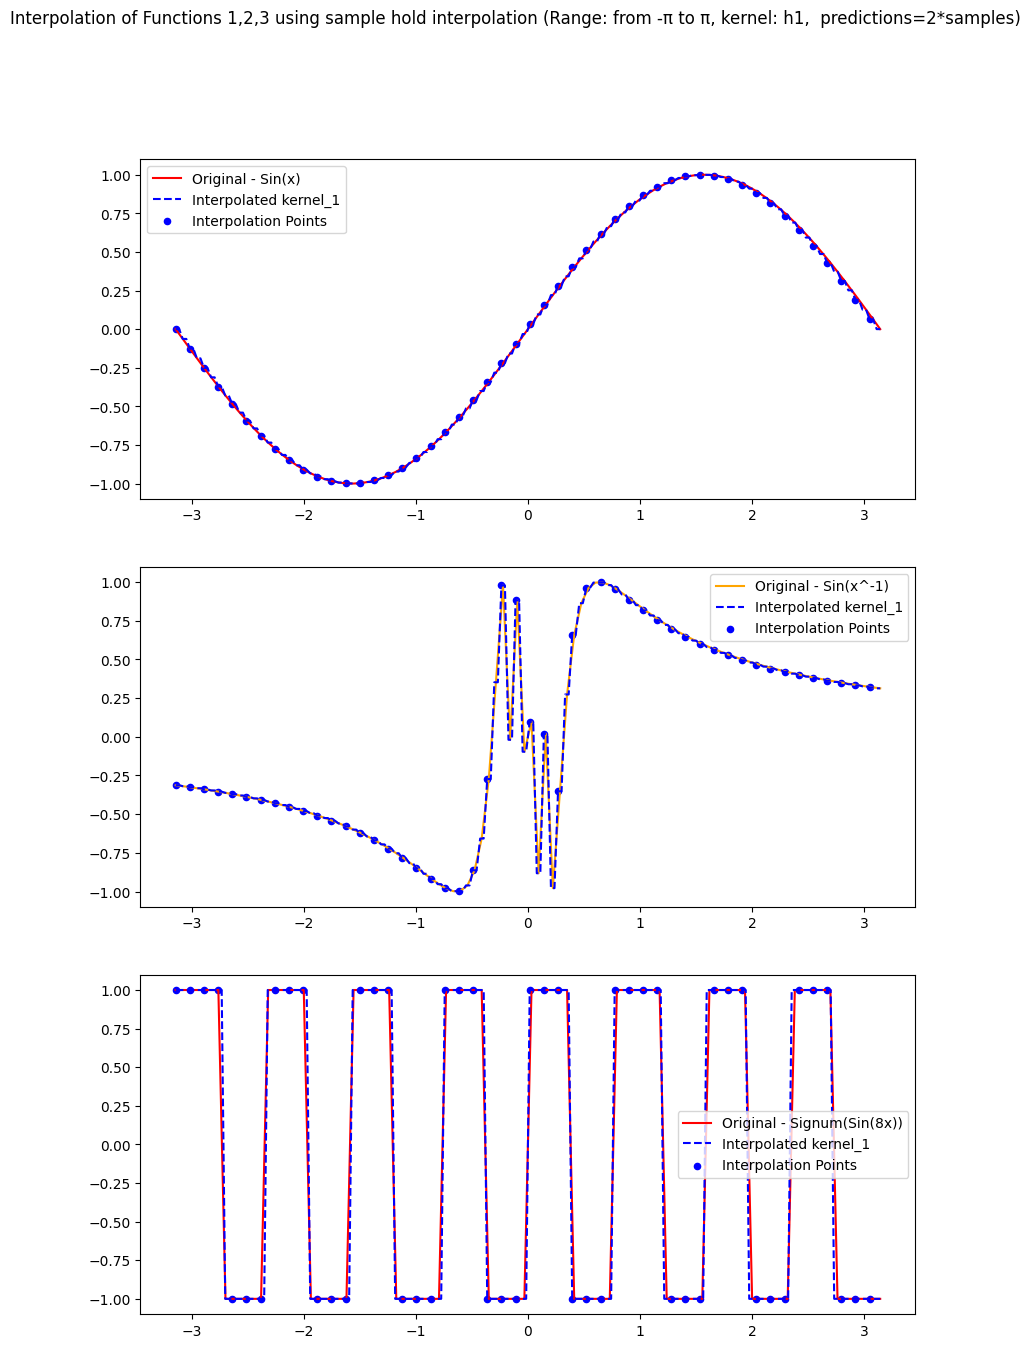

In [40]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics

def function_1(x):
    return np.sin(x)

def function_2(x):
    return np.sin(1 / x)

def function_3(x):
    return np.sign(np.sin(8 * x))

def kernel_1(x):
    return np.where(np.abs(x) < 0.5, 1, 0)

def kernel_2(x):
    return np.where((x >= 0) & (x <= 1), 1, 0)

def kernel_3(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

def conv_interpolate(x, y, x_new, kernel):

    y_new = np.zeros_like(x_new)
    kernel_width=np.median(np.diff(x))
    for i, x_i in enumerate(x_new):
        weights = kernel((x_i - x) / kernel_width)
        y_new[i] = np.sum(weights * y) / np.sum(weights)
    return y_new

n_samples = 100
n2_predictions = 200
n4_predictions = 400
n10_predictions = 1000

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n2_interp, kernel_1)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n2_interp, kernel_1)
y_signum_interp = conv_interpolate(x, y_signum, x_n2_interp, kernel_1)

y_simple_sin_true = function_1(x_n2_interp)
y_inverted_sin_true = function_2(x_n2_interp)
y_signum_true = function_3(x_n2_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h1,  predictions=2*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n2_interp, y_simple_sin_interp, "--", label="Interpolated kernel_1", color="blue")
axs[0].scatter(x_n2_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n2_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_1", color="blue")
axs[1].scatter(x_n2_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n2_interp, y_signum_interp, "--", label="Interpolated kernel_1", color="blue")
axs[2].scatter(x_n2_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()


MSE for Function Sin(x) 4*n predictions: 0.0002
MSE for Function Sin(x^-1) 4*n predictions: 0.0556
MSE for Function Sign(Sin(8x)) 4*n predictions: 0.1800


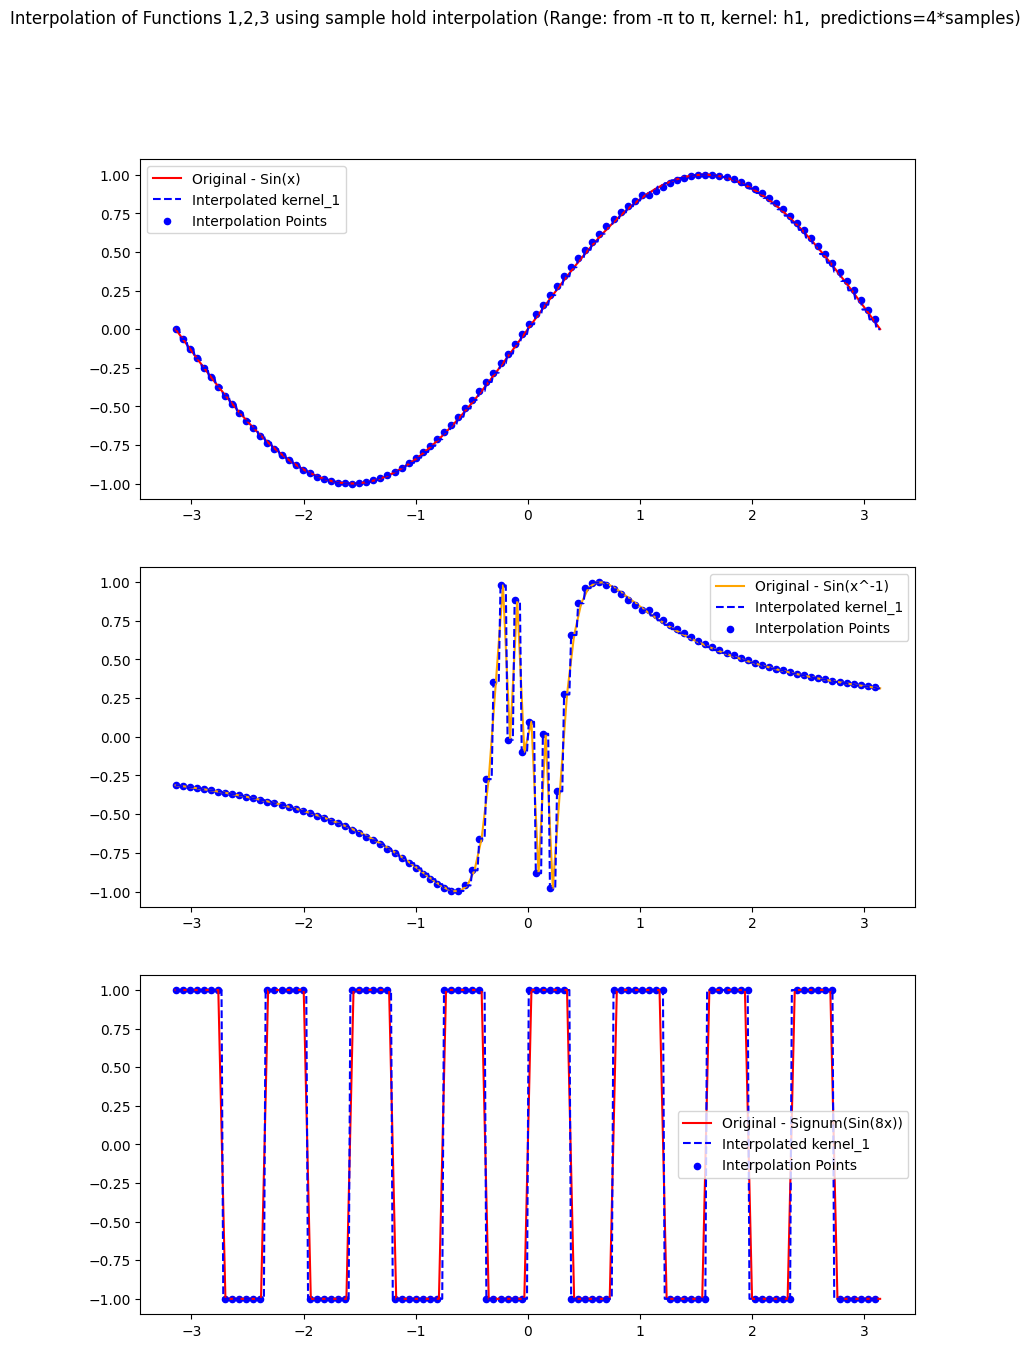

In [41]:

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n4_interp, kernel_1)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n4_interp, kernel_1)
y_signum_interp = conv_interpolate(x, y_signum, x_n4_interp, kernel_1)

y_simple_sin_true = function_1(x_n4_interp)
y_inverted_sin_true = function_2(x_n4_interp)
y_signum_true = function_3(x_n4_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h1,  predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n4_interp, y_simple_sin_interp, "--", label="Interpolated kernel_1", color="blue")
axs[0].scatter(x_n4_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n4_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_1", color="blue")
axs[1].scatter(x_n4_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n4_interp, y_signum_interp, "--", label="Interpolated kernel_1", color="blue")
axs[2].scatter(x_n4_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 4*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 4*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 4*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()

MSE for Function Sin(x) 10*n predictions: 0.0002
MSE for Function Sin(x^-1) 10*n predictions: 0.0490
MSE for Function Sign(Sin(8x)) 10*n predictions: 0.1440


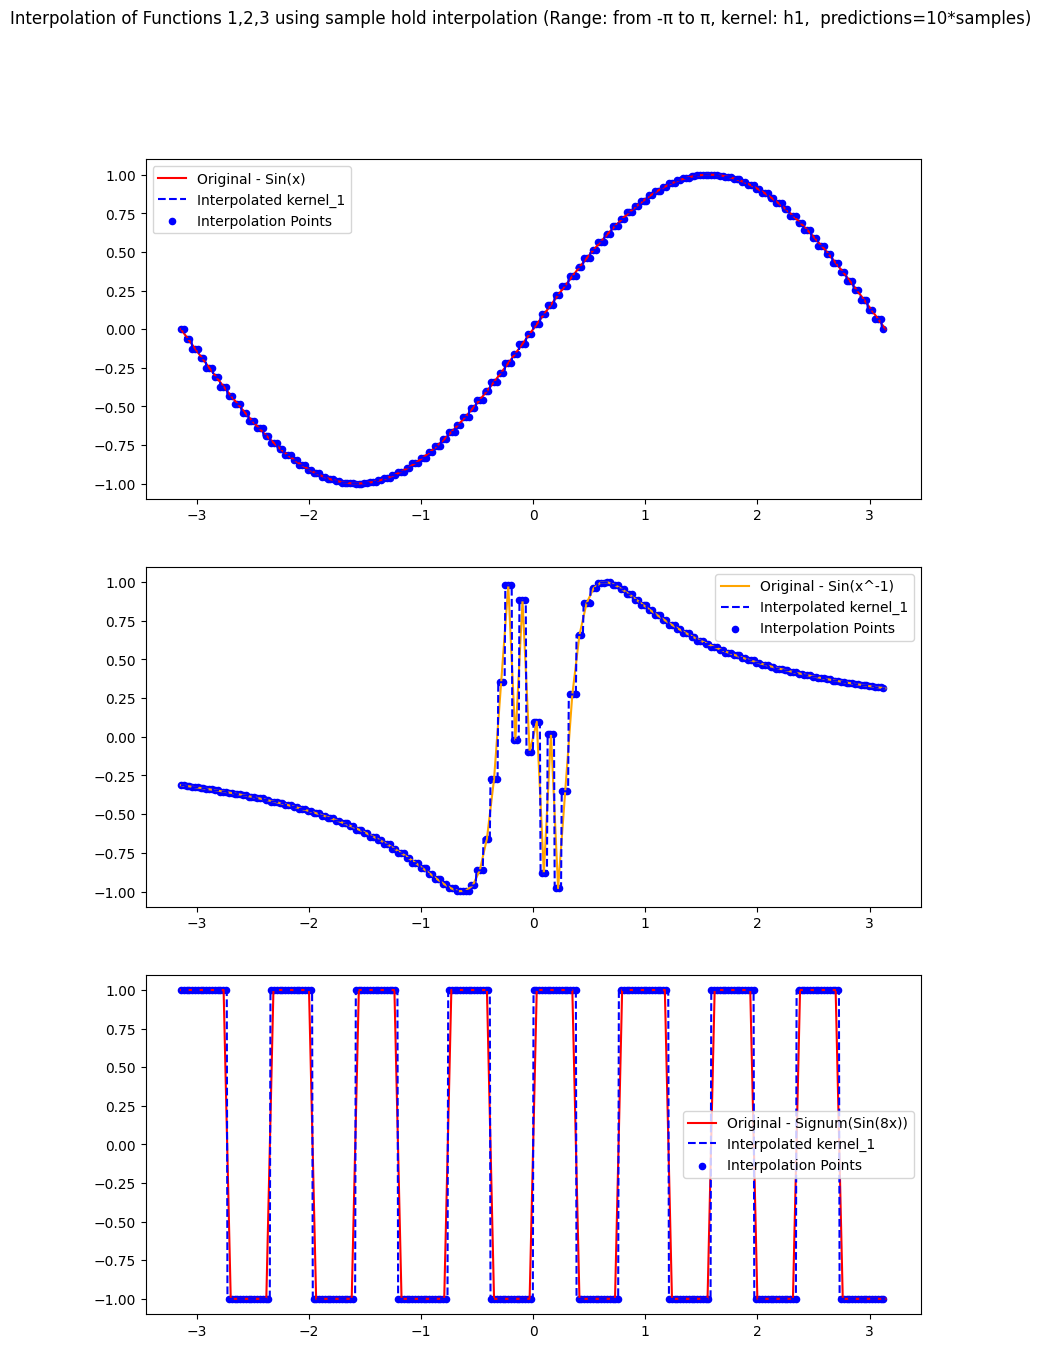

In [42]:

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n10_interp, kernel_1)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n10_interp, kernel_1)
y_signum_interp = conv_interpolate(x, y_signum, x_n10_interp, kernel_1)

y_simple_sin_true = function_1(x_n10_interp)
y_inverted_sin_true = function_2(x_n10_interp)
y_signum_true = function_3(x_n10_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h1,  predictions=10*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n10_interp, y_simple_sin_interp, "--", label="Interpolated kernel_1", color="blue")
axs[0].scatter(x_n10_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n10_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_1", color="blue")
axs[1].scatter(x_n10_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n10_interp, y_signum_interp, "--", label="Interpolated kernel_1", color="blue")
axs[2].scatter(x_n10_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 10*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 10*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 10*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()


MSE for Function Sin(x) 2*n predictions: 0.0007
MSE for Function Sin(x^-1) 2*n predictions: 0.0600
MSE for Function Sign(Sin(8x)) 2*n predictions: 0.3000


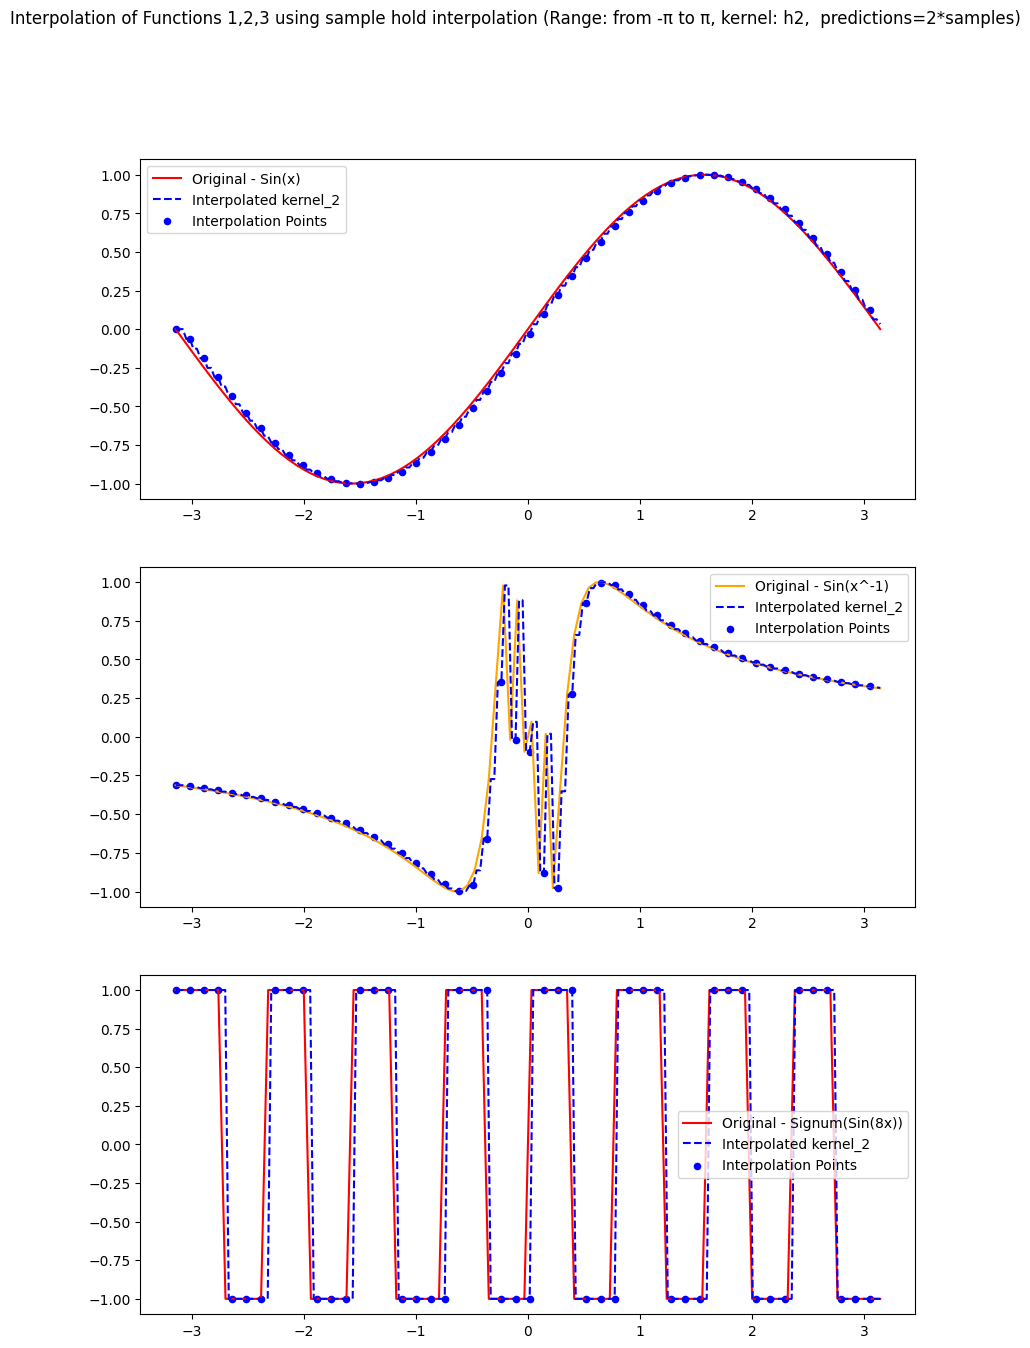

In [43]:
x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n2_interp, kernel_2)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n2_interp, kernel_2)
y_signum_interp = conv_interpolate(x, y_signum, x_n2_interp, kernel_2)

y_simple_sin_true = function_1(x_n2_interp)
y_inverted_sin_true = function_2(x_n2_interp)
y_signum_true = function_3(x_n2_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h2,  predictions=2*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n2_interp, y_simple_sin_interp, "--", label="Interpolated kernel_2", color="blue")
axs[0].scatter(x_n2_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n2_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_2", color="blue")
axs[1].scatter(x_n2_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n2_interp, y_signum_interp, "--", label="Interpolated kernel_2", color="blue")
axs[2].scatter(x_n2_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()

MSE for Function Sin(x) 4*n predictions: 0.0007
MSE for Function Sin(x^-1) 4*n predictions: 0.0669
MSE for Function Sign(Sin(8x)) 4*n predictions: 0.3000


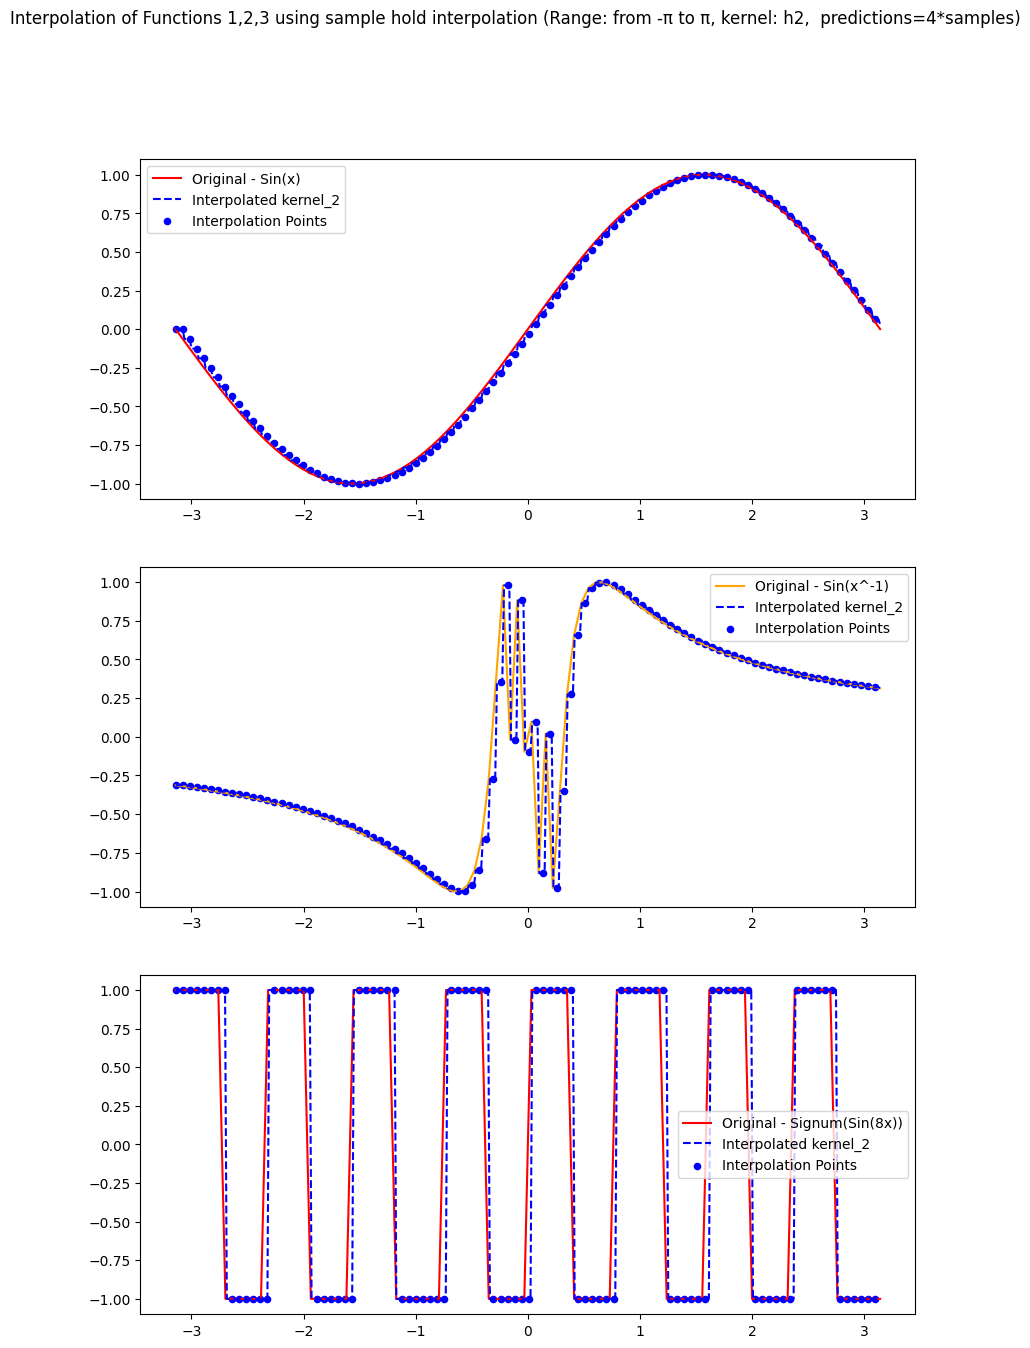

In [44]:

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n4_interp, kernel_2)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n4_interp, kernel_2)
y_signum_interp = conv_interpolate(x, y_signum, x_n4_interp, kernel_2)

y_simple_sin_true = function_1(x_n4_interp)
y_inverted_sin_true = function_2(x_n4_interp)
y_signum_true = function_3(x_n4_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h2,  predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n4_interp, y_simple_sin_interp, "--", label="Interpolated kernel_2", color="blue")
axs[0].scatter(x_n4_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n4_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_2", color="blue")
axs[1].scatter(x_n4_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n4_interp, y_signum_interp, "--", label="Interpolated kernel_2", color="blue")
axs[2].scatter(x_n4_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 4*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 4*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 4*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()

MSE for Function Sin(x) 10*n predictions: 0.0007
MSE for Function Sin(x^-1) 10*n predictions: 0.0606
MSE for Function Sign(Sin(8x)) 10*n predictions: 0.3010


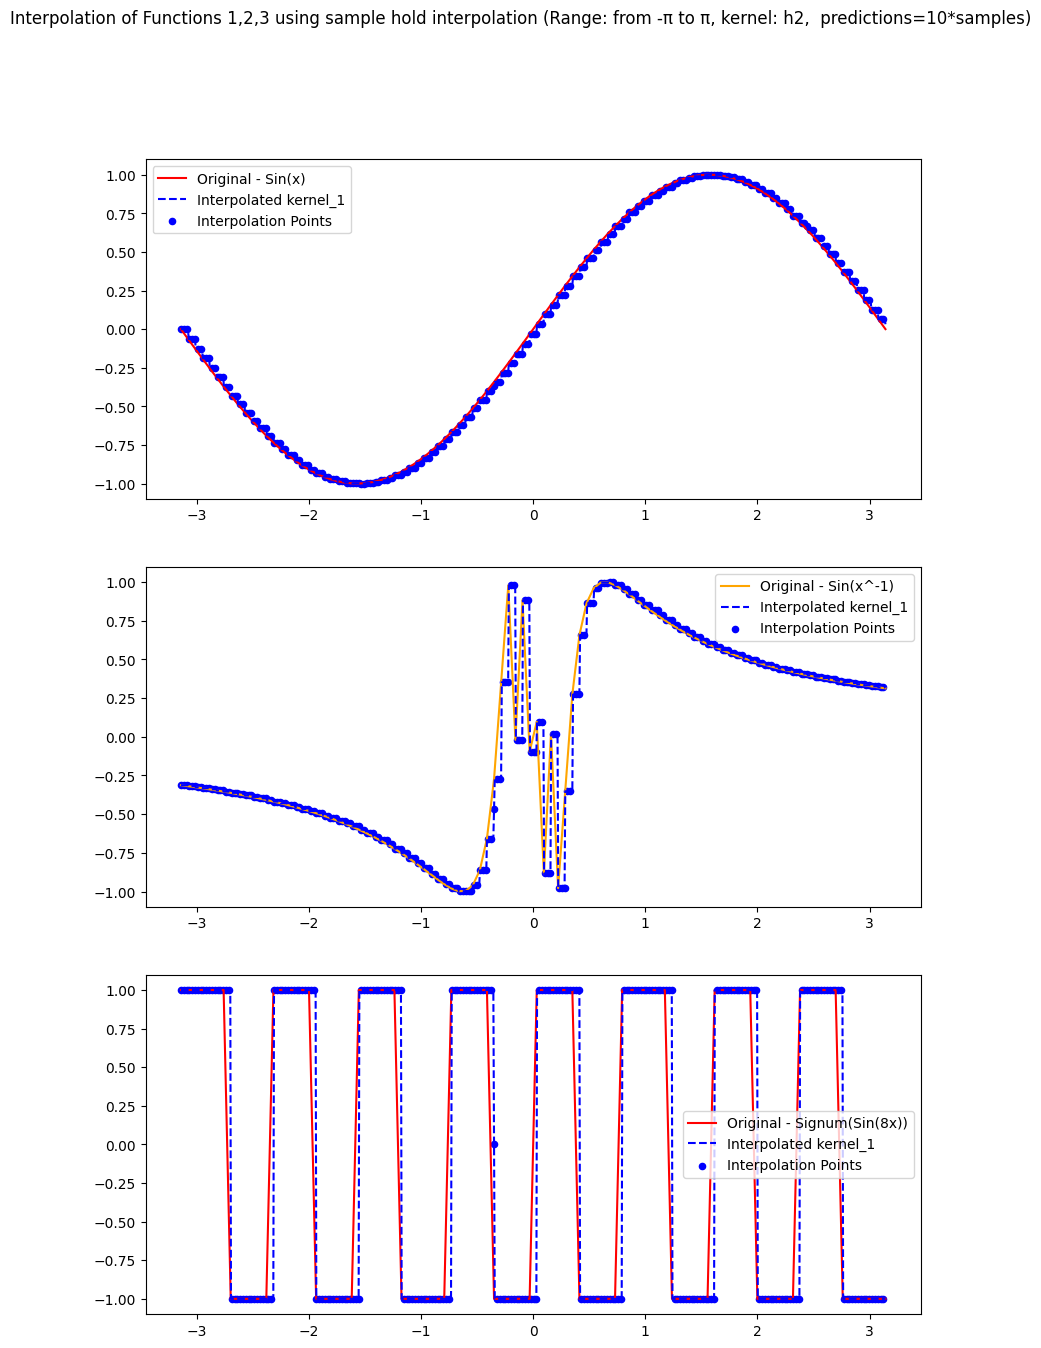

In [45]:

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n10_interp, kernel_2)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n10_interp, kernel_2)
y_signum_interp = conv_interpolate(x, y_signum, x_n10_interp, kernel_2)

y_simple_sin_true = function_1(x_n10_interp)
y_inverted_sin_true = function_2(x_n10_interp)
y_signum_true = function_3(x_n10_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h2,  predictions=10*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n10_interp, y_simple_sin_interp, "--", label="Interpolated kernel_1", color="blue")
axs[0].scatter(x_n10_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n10_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_1", color="blue")
axs[1].scatter(x_n10_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n10_interp, y_signum_interp, "--", label="Interpolated kernel_1", color="blue")
axs[2].scatter(x_n10_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 10*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 10*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 10*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()


MSE for Function Sin(x) 2*n predictions: 0.0000
MSE for Function Sin(x^-1) 2*n predictions: 0.0360
MSE for Function Sign(Sin(8x)) 2*n predictions: 0.0989


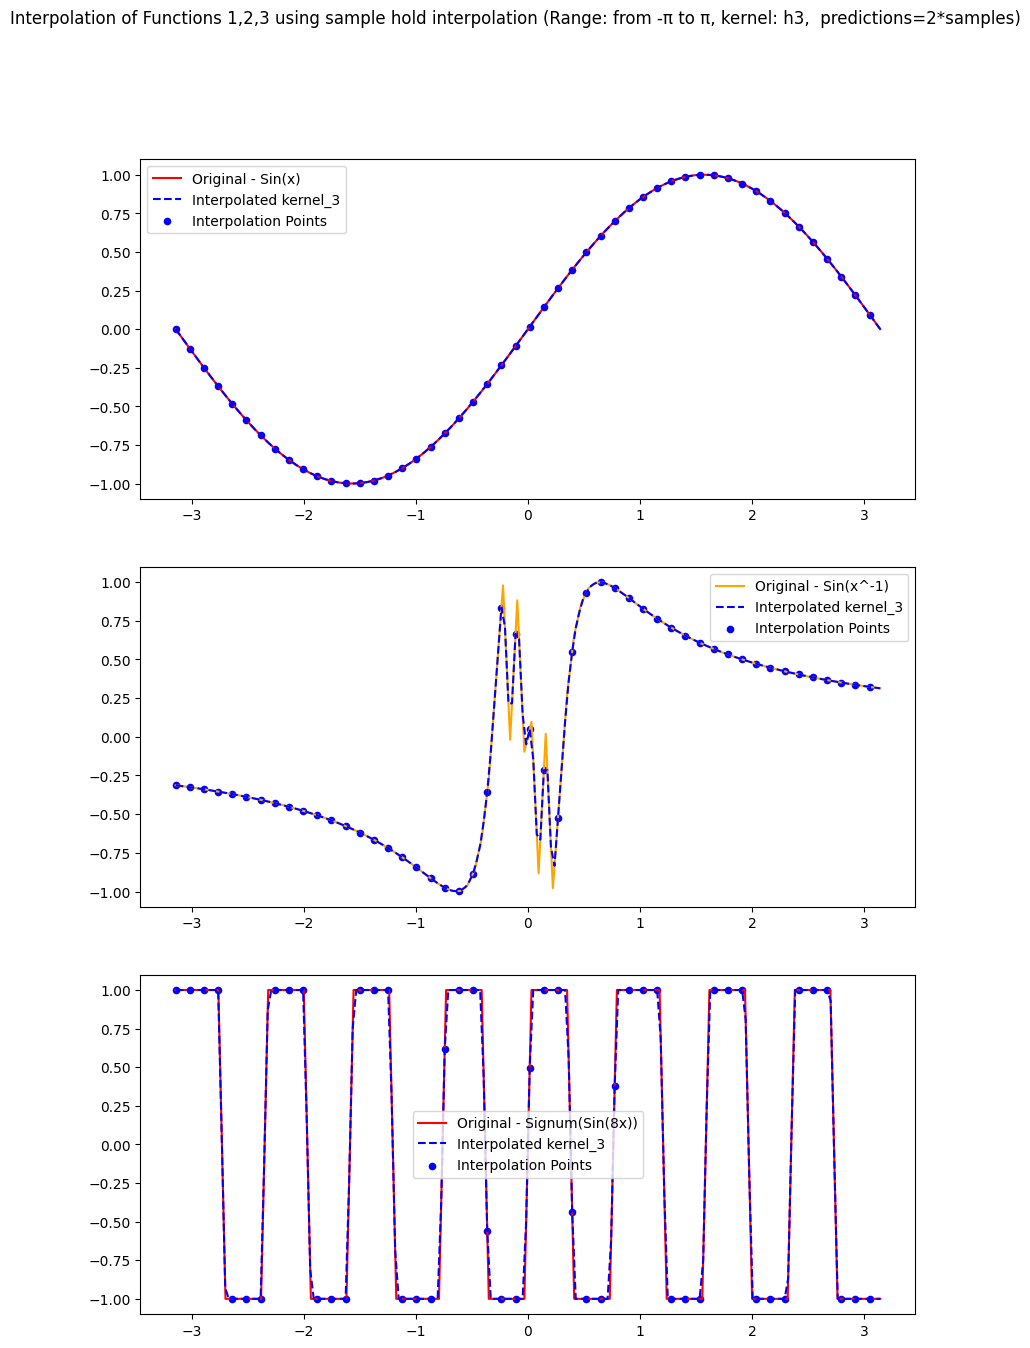

In [46]:
x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n2_interp = np.linspace(-np.pi, np.pi, n2_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n2_interp, kernel_3)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n2_interp, kernel_3)
y_signum_interp = conv_interpolate(x, y_signum, x_n2_interp, kernel_3)

y_simple_sin_true = function_1(x_n2_interp)
y_inverted_sin_true = function_2(x_n2_interp)
y_signum_true = function_3(x_n2_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h3,  predictions=2*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n2_interp, y_simple_sin_interp, "--", label="Interpolated kernel_3", color="blue")
axs[0].scatter(x_n2_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n2_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_3", color="blue")
axs[1].scatter(x_n2_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n2_interp, y_signum_interp, "--", label="Interpolated kernel_3", color="blue")
axs[2].scatter(x_n2_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 2*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 2*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 2*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()

MSE for Function Sin(x) 4*n predictions: 0.0000
MSE for Function Sin(x^-1) 4*n predictions: 0.0440
MSE for Function Sign(Sin(8x)) 4*n predictions: 0.0972


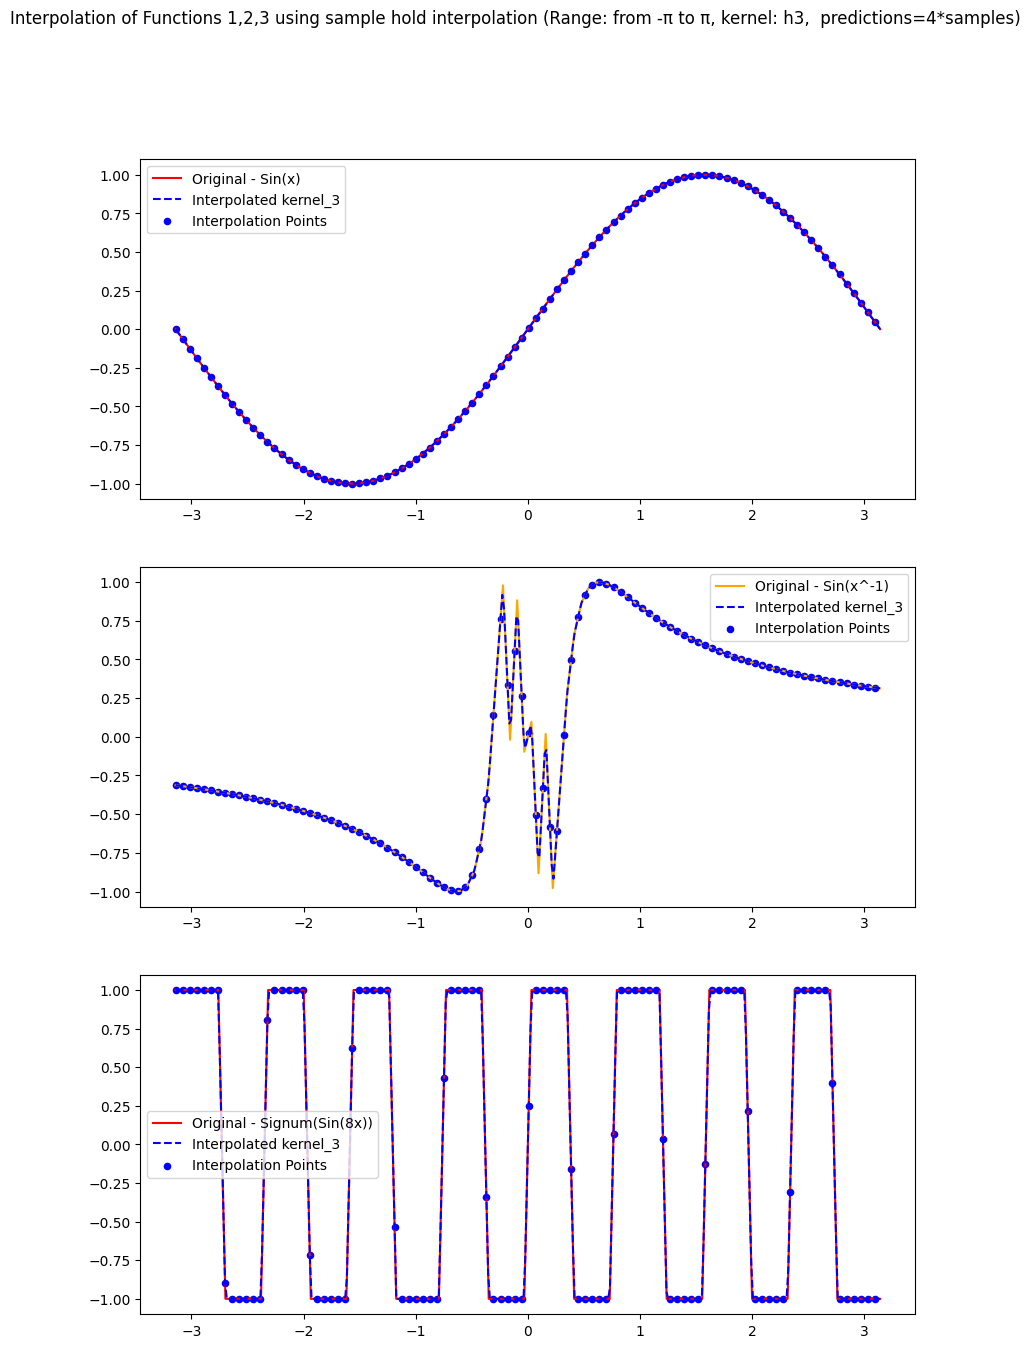

In [47]:

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n4_interp = np.linspace(-np.pi, np.pi, n4_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n4_interp, kernel_3)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n4_interp, kernel_3)
y_signum_interp = conv_interpolate(x, y_signum, x_n4_interp, kernel_3)

y_simple_sin_true = function_1(x_n4_interp)
y_inverted_sin_true = function_2(x_n4_interp)
y_signum_true = function_3(x_n4_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h3,  predictions=4*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n4_interp, y_simple_sin_interp, "--", label="Interpolated kernel_3", color="blue")
axs[0].scatter(x_n4_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n4_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_3", color="blue")
axs[1].scatter(x_n4_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n4_interp, y_signum_interp, "--", label="Interpolated kernel_3", color="blue")
axs[2].scatter(x_n4_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 4*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 4*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 4*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()

MSE for Function Sin(x) 10*n predictions: 0.0000
MSE for Function Sin(x^-1) 10*n predictions: 0.0381
MSE for Function Sign(Sin(8x)) 10*n predictions: 0.0958


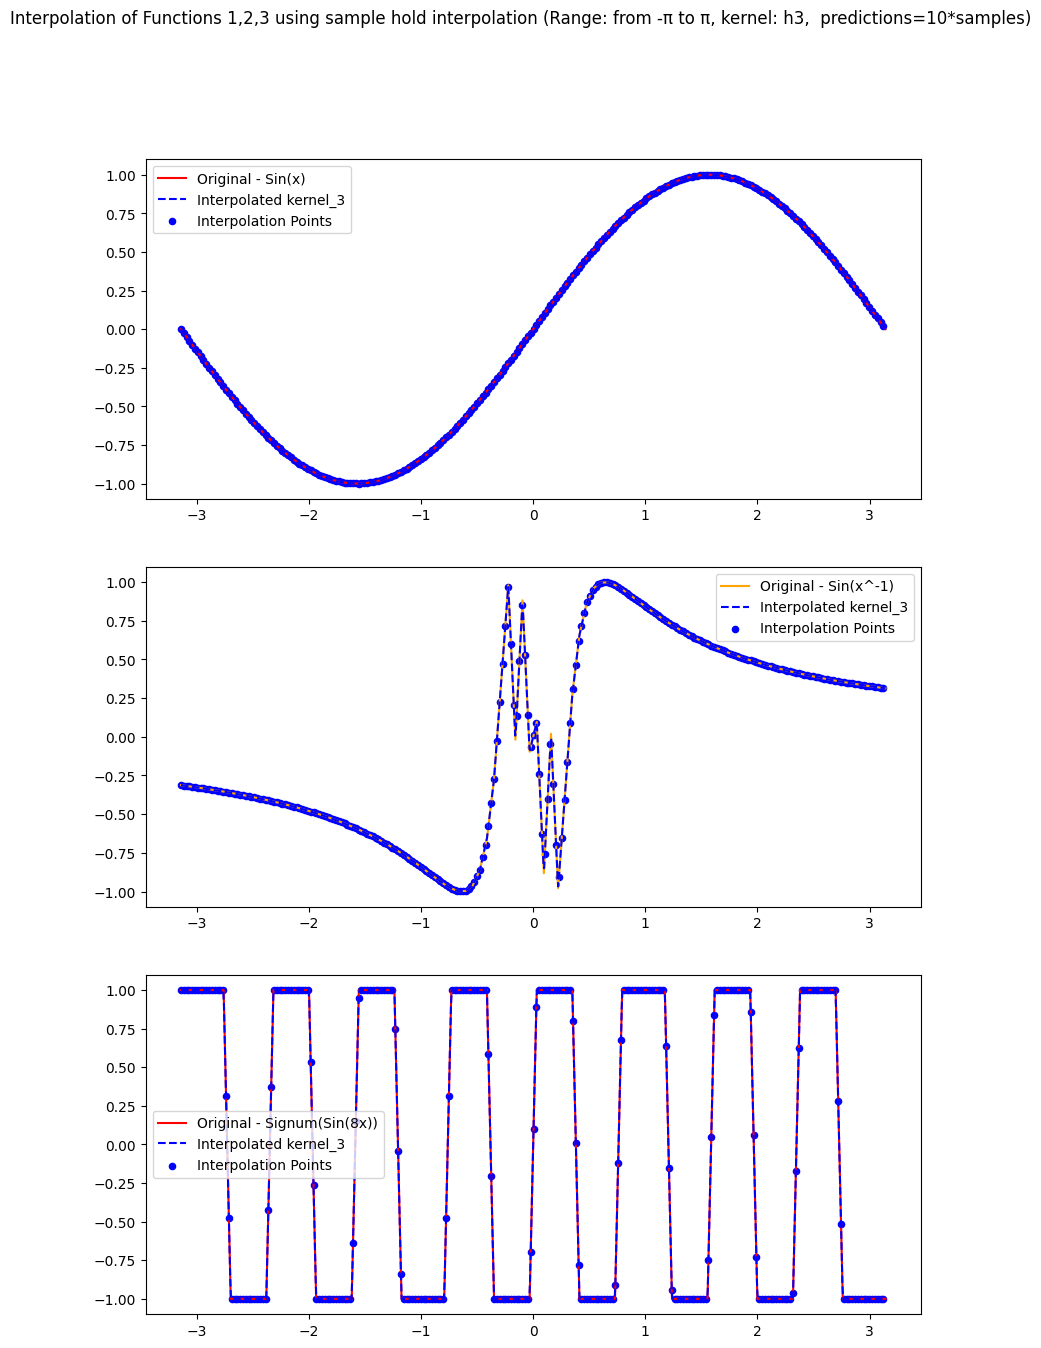

In [51]:

x = np.linspace(-np.pi, np.pi, n_samples)

y_simple_sin = function_1(x)
y_inverted_sin = np.nan_to_num(function_2(x))
y_signum = function_3(x)

x_n10_interp = np.linspace(-np.pi, np.pi, n10_predictions)

y_simple_sin_interp = conv_interpolate(x, y_simple_sin, x_n10_interp, kernel_3)
y_inverted_sin_interp = conv_interpolate(x, y_inverted_sin, x_n10_interp, kernel_3)
y_signum_interp = conv_interpolate(x, y_signum, x_n10_interp, kernel_3)

y_simple_sin_true = function_1(x_n10_interp)
y_inverted_sin_true = function_2(x_n10_interp)
y_signum_true = function_3(x_n10_interp)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

fig.suptitle("Interpolation of Functions 1,2,3 using sample hold interpolation (Range: from -π to π, kernel: h3,  predictions=10*samples)")

axs[0].plot(x, y_simple_sin, label="Original - Sin(x)", color="red")
axs[0].plot(x_n10_interp, y_simple_sin_interp, "--", label="Interpolated kernel_3", color="blue")
axs[0].scatter(x_n10_interp[::4], y_simple_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[0].legend()

axs[1].plot(x, y_inverted_sin, label="Original - Sin(x^-1)", color="orange")
axs[1].plot(x_n10_interp, y_inverted_sin_interp, "--", label="Interpolated kernel_3", color="blue")
axs[1].scatter(x_n10_interp[::4], y_inverted_sin_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[1].legend()

axs[2].plot(x, y_signum, label="Original - Signum(Sin(8x))", color="red")
axs[2].plot(x_n10_interp, y_signum_interp, "--", label="Interpolated kernel_3", color="blue")
axs[2].scatter(x_n10_interp[::4], y_signum_interp[::4], color="blue", label="Interpolation Points", s=20)
axs[2].legend()

print(f"MSE for Function Sin(x) 10*n predictions: {metrics.mean_squared_error(y_pred=y_simple_sin_interp, y_true=y_simple_sin_true):.4f}")
print(f"MSE for Function Sin(x^-1) 10*n predictions: {metrics.mean_squared_error(y_pred=y_inverted_sin_interp, y_true=y_inverted_sin_true):.4f}")
print(f"MSE for Function Sign(Sin(8x)) 10*n predictions: {metrics.mean_squared_error(y_pred=y_signum_interp, y_true=y_signum_true):.4f}")

plt.show()
